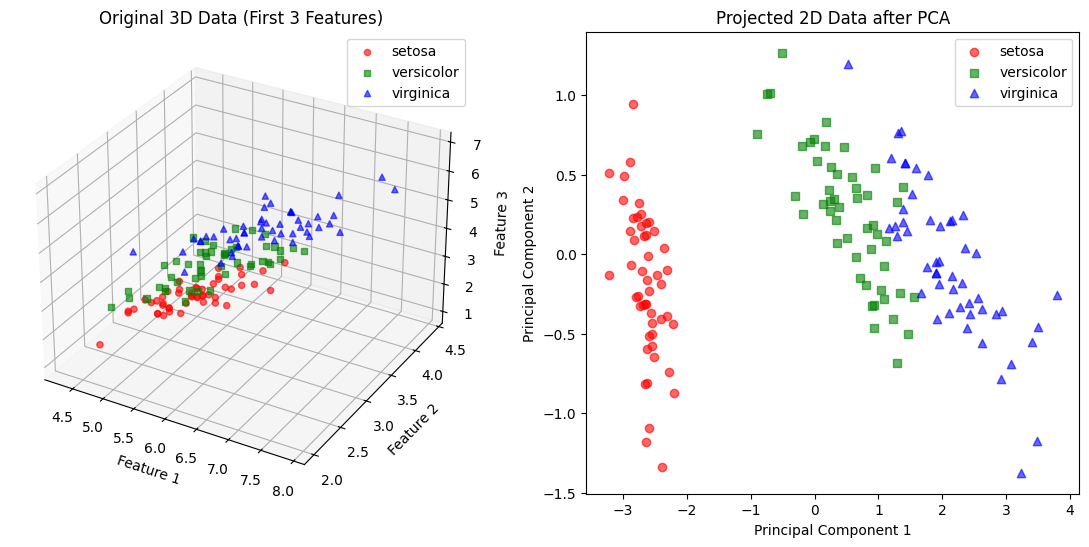

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (4D)
y = iris.target  # Labels (3 classes)

# Step 1: Standardize the data (mean center it)
X_centered = X - np.mean(X, axis=0)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Step 3: Perform eigen decomposition of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
top_eigenvectors = eigenvectors[:, :2]  # Select top 2 eigenvectors for 2D projection

# Step 5: Project the data onto the 2D principal components
X_2d = np.dot(X_centered, top_eigenvectors)

# Step 6: Plot the original 3D data (using first 3 features as proxies for 3D space)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(121, projection='3d')

# Colors and markers for each class
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']
labels = iris.target_names

# Scatter plot for each class with different colors and markers
for i in range(3):
    ax.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 2],   color=colors[i], marker=markers[i], label=labels[i], alpha=0.6)

# Set labels and title for 3D plot
ax.set_title('Original 3D Data (First 3 Features)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()

# Step 7: Plot the reduced 2D data with different colors and markers
ax2 = fig.add_subplot(122)
for i in range(3):
    ax2.scatter(X_2d[y == i, 0], X_2d[y == i, 1], 
                color=colors[i], marker=markers[i], label=labels[i], alpha=0.6)

# Set labels and title for 2D plot
ax2.set_title('Projected 2D Data after PCA')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.legend()

plt.show()